# Data Preprocessing

## Problem Statement 1 - Optimisation Advertisement Moderation

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Preparing Data

In [9]:
data = pd.ExcelFile('tiktok/ad_ranking_raw.xlsx')
ads = pd.read_excel(data, sheet_name='ads dimension (dim table)', header=1)
mods = pd.read_excel(data, sheet_name='moderator dimension (dim table)', header=0)

In [10]:
ads.head(10)

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,20230807,1747578422390810,US,USCA,1.0,2023-07-24,5132.1700,4795.250,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation
1,20230807,1758543228094480,SA,MENA,1.0,2023-06-14,1976.2500,1063.767,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged)
2,20230807,1738303151826990,AU,AU,2.0,2023-07-24,1.7355,5.365,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation
3,20230807,1738303920938010,NZ,NZ,2.0,2023-07-24,NaN,5.365,2022-07-14 05:16:00,1.58,Auction Ads,auction_relation
4,20230807,1738304016410620,NZ,NZ,2.0,2023-07-24,1.5250,5.365,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation
5,20230807,1738304421208090,NZ,NZ,2.0,2023-07-24,0.7889,5.365,2022-07-14 05:24:00,1.58,Auction Ads,auction_relation
6,20230807,1738304605976620,NZ,NZ,2.0,2023-07-24,0.8151,5.365,2022-07-14 05:26:00,1.58,Auction Ads,auction_relation
7,20230807,1724385503656970,FI,Other,1.0,2023-06-27,363.3607,491.045,2022-02-10 14:07:00,1.62,RIE,Ad Group Recall (Merged)
8,20230807,1764813273437210,US,USCA,1.0,2023-07-05,495.1700,688.138,2023-05-02 20:51:00,1.78,Auction Ads,auction_relation
9,20230807,1763583923607580,NZ,NZ,2.0,2023-07-24,1.6763,5.365,2023-04-19 06:05:00,1.58,Auction Ads,auction_relation


In [11]:
mods.head(10)

,moderator,market,Productivity,Utilisation %,handling time,accuracy
0,1689841547143170,"[""SA"", ""OM"", ""BH"", ""QA"", ""JO"", ""IQ"", ""KW"", ""EG...",286.217674,0.812403,123549,-
1,1686755036370945,"[""RO""]",174.560000,0.704833,25547,0.959
2,1741913197768705,"[""VN""]",334.376000,0.819167,50794,1
3,1743415203890193,"[""MX"", ""UY"", ""CL"", ""AR"", ""CO"", ""EC"", ""PE"", ""BR""]",452.277500,0.775474,89626,0.941
4,1710346282427393,"[""PH""]",612.312500,0.843229,98066,0.887
5,1748544247125010,"[""MX"", ""UY"", ""CO"", ""CL"", ""AR"", ""EC"", ""PE"", ""BR""]",292.330000,0.678776,80656,0.739
6,1693678171087873,"[""VN""]",189.180000,0.850500,48657,0.952
7,1771763479218193,"[""DK""]",259.580000,0.839271,72591,0.881
8,1694041901312002,"[""TR""]",313.552500,0.877083,101102,1
9,6728796,"[""TR"", ""GB"", ""IE""]",441.625000,0.617240,75246,0.766


### Preparation for Advertisement dataset

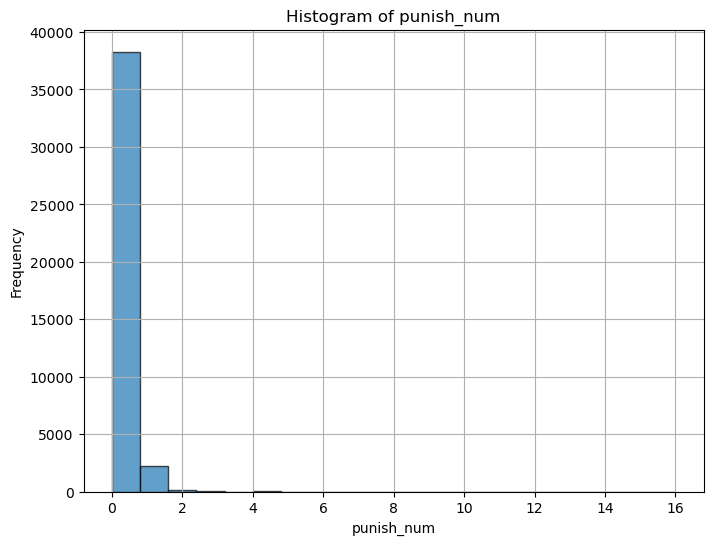

In [12]:
## filling null with 0 for punish_num
ads['punish_num'].fillna(0, inplace=True)

# plotting punish_num on boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(ads['punish_num'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of punish_num')
plt.xlabel('punish_num')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
## cleaning delivery_country column

# ads['queue_market_list'] = ads['queue_market'].str.replace('/', ',').str.replace('&', ',').str.strip().str.split(',')

def split_market(entry):
    if pd.notna(entry):
        if '/' in entry:
            return entry.split('/')
        elif '&' in entry:
            return entry.split('&')
        elif entry == 'USCA':
            return ['US', 'CA']
        elif entry == 'MENA':
            return ['ME', 'NA']
        else:
            return [entry]
    else:
        return [entry] 

ads['queue_market_list'] = ads['queue_market'].apply(split_market)

ads['queue_market_list'] = ads['queue_market_list'].apply(lambda x: ['Others'] if 'Other' in x else x)

In [18]:
## cleaning ad_revenue

ads['ad_revenue'].fillna(0, inplace=True)

In [ ]:
### Preparation for Moderator dataset

In [20]:
mods = mods.dropna(subset=['Productivity', 'Utilisation %'])

In [21]:
mods.head(20)

,moderator,market,Productivity,Utilisation %,handling time,accuracy
0,1689841547143170,"[""SA"", ""OM"", ""BH"", ""QA"", ""JO"", ""IQ"", ""KW"", ""EG...",286.217674,0.812403,123549,-
1,1686755036370945,"[""RO""]",174.560000,0.704833,25547,0.959
2,1741913197768705,"[""VN""]",334.376000,0.819167,50794,1
3,1743415203890193,"[""MX"", ""UY"", ""CL"", ""AR"", ""CO"", ""EC"", ""PE"", ""BR""]",452.277500,0.775474,89626,0.941
4,1710346282427393,"[""PH""]",612.312500,0.843229,98066,0.887
5,1748544247125010,"[""MX"", ""UY"", ""CO"", ""CL"", ""AR"", ""EC"", ""PE"", ""BR""]",292.330000,0.678776,80656,0.739
6,1693678171087873,"[""VN""]",189.180000,0.850500,48657,0.952
7,1771763479218193,"[""DK""]",259.580000,0.839271,72591,0.881
8,1694041901312002,"[""TR""]",313.552500,0.877083,101102,1
9,6728796,"[""TR"", ""GB"", ""IE""]",441.625000,0.617240,75246,0.766


## Export as Excel

In [23]:
with pd.ExcelWriter('tiktok/ad_ranking_clean.xlsx') as writer:
    ads.to_excel(writer, sheet_name='Ads', index=False)

    mods.to_excel(writer, sheet_name='Mods', index=False)